---

Using *Bureau of Meteorology* Climate Data Online, I am investigating the daily rainfall for Brisbane and identifying significant periods of time during the last 3 years. Once significant periods of time are found, I compare Brisbane's rainfall for those periods with Sydney. I will then elaborate on what insights can be gained from this analysis, and who might benefit from them?

#### Data:

[BOM Climate Data Online](http://www.bom.gov.au/climate/data/index.shtml?bookmark=136)


In [1]:
# importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 250


### 1. Question


Heavy rainfall (either in one day or in consecutive days) increases the risk of flood. The Federal Governement wants to know the risk of flood only based on ONE factor which is heavy rainfall in Brisbane and Sydney. Obviously, there are other factors that increas the risk of flood, but our concern in this analysis is ONLY the intensity of the rainfall; in other words, which city has had the most amount of rain in the shortest time period. 

### 2. Data

I have to filter the data to get the data only for 2019, 2020,2021. I did not use the data for 2022 because the data was not complete and it could not provide me with the comparsion I expect. 
I did this filtering by creating a function to do for the two cities of Brisbane and Sydney. 

In [2]:
def filter2019to2021(df1):
    return df1[(df1['Year'] >= 2019) & (df1['Year'] <= 2021)]

brisbane_df =  pd.read_csv('IDCJAC0009_040913_1800_Data.csv')
sydney_df = pd.read_csv('IDCJAC0009_066006_1800_Data.csv')

brisbane_df = filter2019to2021(brisbane_df)
sydney_df = filter2019to2021(sydney_df)


I renamed one of the columns of the data so working with it is easier. 

In [3]:
brisbane_df.rename(columns = {'Rainfall amount (millimetres)':'Brisbane_rainfall'}, inplace = True)
sydney_df.rename(columns = {'Rainfall amount (millimetres)':'Sydney_rainfall'}, inplace = True)


I merged the data for Brisbane with the data for Sydney based on the date. Now, I have two columns for "Brisbane_rainfall" and "Sydney_rainfall" in the same dataframe. 

In [4]:
df = pd.merge(brisbane_df, sydney_df, on=['Year', 'Month', 'Day'])
df

,Product code_x,Bureau of Meteorology station number_x,Year,Month,Day,Brisbane_rainfall,Period over which rainfall was measured (days)_x,Quality_x,Product code_y,Bureau of Meteorology station number_y,Sydney_rainfall,Period over which rainfall was measured (days)_y,Quality_y
0,IDCJAC0009,40913,2019,1,1,0.0,1.0,N,IDCJAC0009,66006,9.4,1.0,Y
1,IDCJAC0009,40913,2019,1,2,0.0,1.0,N,IDCJAC0009,66006,0.0,NaN,Y
2,IDCJAC0009,40913,2019,1,3,8.4,1.0,N,IDCJAC0009,66006,0.0,NaN,Y
3,IDCJAC0009,40913,2019,1,4,7.0,1.0,N,IDCJAC0009,66006,0.0,NaN,Y
4,IDCJAC0009,40913,2019,1,5,0.2,1.0,N,IDCJAC0009,66006,0.0,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,IDCJAC0009,40913,2021,12,27,0.0,1.0,N,IDCJAC0009,66006,5.3,1.0,N
1092,IDCJAC0009,40913,2021,12,28,14.6,1.0,N,IDCJAC0009,66006,22.0,1.0,N
1093,IDCJAC0009,40913,2021,12,29,0.0,1.0,N,IDCJAC0009,66006,7.8,1.0,N
1094,IDCJAC0009,40913,2021,12,30,0.0,1.0,N,IDCJAC0009,66006,9.2,1.0,N


In [5]:
#  I made a new column for "date" to merge the Year, Month, and Day columns to get
# a unique number for each day. I will make it easier for plotting later on. 

import datetime

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df

,Product code_x,Bureau of Meteorology station number_x,Year,Month,Day,Brisbane_rainfall,Period over which rainfall was measured (days)_x,Quality_x,Product code_y,Bureau of Meteorology station number_y,Sydney_rainfall,Period over which rainfall was measured (days)_y,Quality_y,Date
0,IDCJAC0009,40913,2019,1,1,0.0,1.0,N,IDCJAC0009,66006,9.4,1.0,Y,2019-01-01
1,IDCJAC0009,40913,2019,1,2,0.0,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-02
2,IDCJAC0009,40913,2019,1,3,8.4,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-03
3,IDCJAC0009,40913,2019,1,4,7.0,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-04
4,IDCJAC0009,40913,2019,1,5,0.2,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,IDCJAC0009,40913,2021,12,27,0.0,1.0,N,IDCJAC0009,66006,5.3,1.0,N,2021-12-27
1092,IDCJAC0009,40913,2021,12,28,14.6,1.0,N,IDCJAC0009,66006,22.0,1.0,N,2021-12-28
1093,IDCJAC0009,40913,2021,12,29,0.0,1.0,N,IDCJAC0009,66006,7.8,1.0,N,2021-12-29
1094,IDCJAC0009,40913,2021,12,30,0.0,1.0,N,IDCJAC0009,66006,9.2,1.0,N,2021-12-30


### 3. Analysis

In order to find heavy rainfalls during those three years, we are not just interested in the heaviest rainfall PER DAY. Although it increses the risk of flood but the same amount of rain might fall during a shorter period such as 2-4 days. Such rainfall imposes the same risk of flood as if it falls in one single day. 
I used moving average technique to identify the periods with the heaviest rainfall. This moving average is calculated over the period of 4 days. 
Two new columns are  added to our dataframe for the moving average of Brisbane (BNE_4) and Sydney (SYD_4).


In [6]:
# the simple moving average over a period of 4 days
df['BNE_4'] = df.Brisbane_rainfall.rolling(4, min_periods=1).mean()
df['SYD_4'] = df.Sydney_rainfall.rolling(4, min_periods=1).mean()
df

,Product code_x,Bureau of Meteorology station number_x,Year,Month,Day,Brisbane_rainfall,Period over which rainfall was measured (days)_x,Quality_x,Product code_y,Bureau of Meteorology station number_y,Sydney_rainfall,Period over which rainfall was measured (days)_y,Quality_y,Date,BNE_4,SYD_4
0,IDCJAC0009,40913,2019,1,1,0.0,1.0,N,IDCJAC0009,66006,9.4,1.0,Y,2019-01-01,0.00,9.400000
1,IDCJAC0009,40913,2019,1,2,0.0,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-02,0.00,4.700000
2,IDCJAC0009,40913,2019,1,3,8.4,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-03,2.80,3.133333
3,IDCJAC0009,40913,2019,1,4,7.0,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-04,3.85,2.350000
4,IDCJAC0009,40913,2019,1,5,0.2,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-01-05,3.90,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,IDCJAC0009,40913,2021,12,27,0.0,1.0,N,IDCJAC0009,66006,5.3,1.0,N,2021-12-27,6.15,3.275000
1092,IDCJAC0009,40913,2021,12,28,14.6,1.0,N,IDCJAC0009,66006,22.0,1.0,N,2021-12-28,5.55,6.825000
1093,IDCJAC0009,40913,2021,12,29,0.0,1.0,N,IDCJAC0009,66006,7.8,1.0,N,2021-12-29,5.55,8.775000
1094,IDCJAC0009,40913,2021,12,30,0.0,1.0,N,IDCJAC0009,66006,9.2,1.0,N,2021-12-30,3.65,11.075000


In [7]:
# Here is the moving average for Brisbane:
df['BNE_4']

0       0.00
1       0.00
2       2.80
3       3.85
4       3.90
        ... 
1091    6.15
1092    5.55
1093    5.55
1094    3.65
1095    3.65
Name: BNE_4, Length: 1096, dtype: float64

I was interested to know the general average of the rainfall in each city for 2019-2021. For that, I described the dataframe as follows. The average of rainfall for Sydney has been higher than Brisbane for the past three years. 
Sydney = 3.51 mm
Brisbane = 2.88 mm 

In [8]:
df.describe()

,Bureau of Meteorology station number_x,Year,Month,Day,Brisbane_rainfall,Period over which rainfall was measured (days)_x,Bureau of Meteorology station number_y,Sydney_rainfall,Period over which rainfall was measured (days)_y,BNE_4,SYD_4
count,1096.0,1096.000000,1096.000000,1096.000000,1064.000000,1064.0,1096.0,1095.000000,447.000000,1085.000000,1096.000000
mean,40913.0,2020.000000,6.521898,15.732664,2.881203,1.0,66006.0,3.519452,1.002237,2.904531,3.521183
std,0.0,0.816497,3.450561,8.805388,10.681431,0.0,0.0,11.079967,0.047298,6.975405,7.826949
min,40913.0,2019.000000,1.000000,1.000000,0.000000,1.0,66006.0,0.000000,1.000000,0.000000,0.000000
25%,40913.0,2019.000000,4.000000,8.000000,0.000000,1.0,66006.0,0.000000,1.000000,0.000000,0.000000
50%,40913.0,2020.000000,7.000000,16.000000,0.000000,1.0,66006.0,0.000000,1.000000,0.266667,0.800000
75%,40913.0,2021.000000,10.000000,23.000000,0.450000,1.0,66006.0,1.700000,1.000000,2.400000,4.087500
max,40913.0,2021.000000,12.000000,31.000000,130.400000,1.0,66006.0,187.000000,2.000000,50.000000,101.625000


I was also interested to know which city had the higher average of dry days during the period. Brisbane has had more dry days but the difference between the two cities does not seem to be significant. 

In [9]:
print('Avg number of days per year with no rainfall in Brisabne (2019-2021):', int(len(df[df['Brisbane_rainfall']==0])/3) , 'out of 365')
print('Avg number of days per year with no rainfall in Sydney (2019-2021):', int(len(df[df['Sydney_rainfall']==0])/3) , 'out of 365')


Avg number of days per year with no rainfall in Brisabne (2019-2021): 239 out of 365
Avg number of days per year with no rainfall in Sydney (2019-2021): 219 out of 365


### 4. Visualisation

I first plotted the daily rainfall for Brisbane and Sydney to get an idea of the peaks. 

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


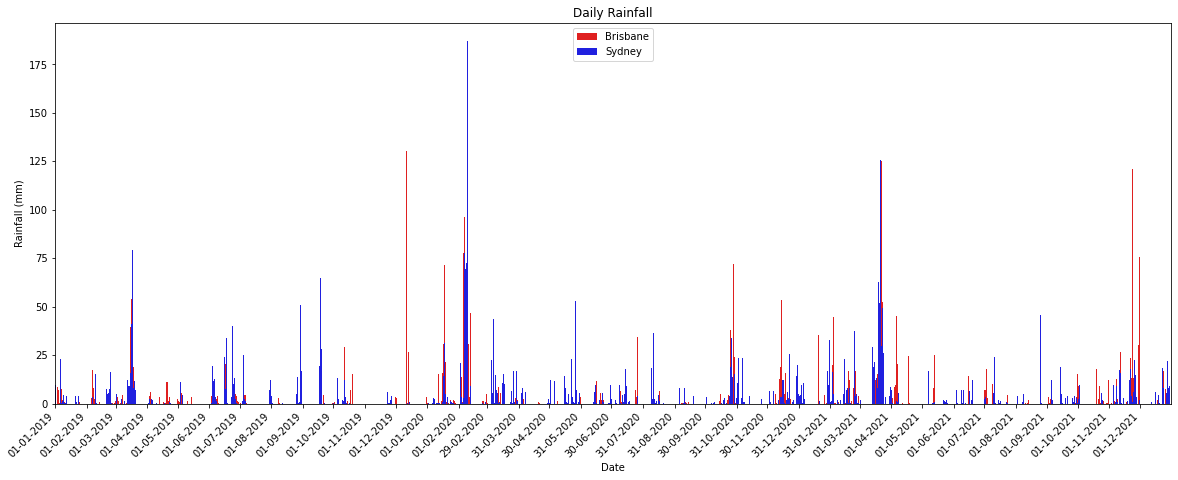

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.dates as md

fig,ax = plt.subplots(figsize=(20,7))

sns.barplot(x=df['Date'], y=df['Brisbane_rainfall'], color="red", label="Brisbane")
sns.barplot(x=df['Date'], y=df['Sydney_rainfall'], color="blue",label="Sydney")


# specify the position of the major ticks at the beginning of the week

ax.set_xticklabels(labels=df['Date'].dt.strftime('%d-%m-%Y'), rotation=45, ha='right')
ax.xaxis.set_major_locator(md.MonthLocator())
ax.legend()
plt.title("Daily Rainfall")

plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")

plt.show()

Then, I plotted the simple moving average to get an idea of the significant periods in the two cities.

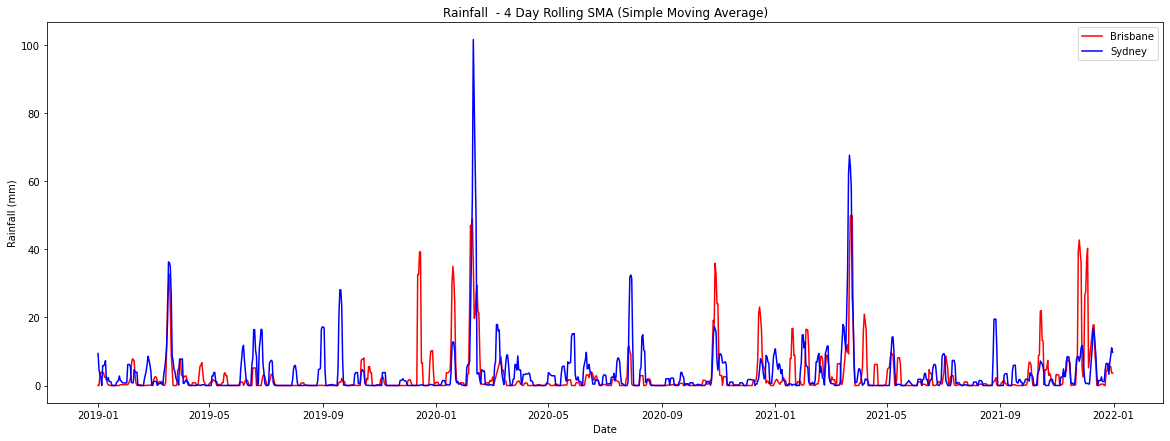

In [11]:
fig,ax = plt.subplots(figsize=(20,7))
sns.lineplot(x=df['Date'], y=df['BNE_4'], color="red", label="Brisbane")
sns.lineplot(x=df['Date'], y=df['SYD_4'], color="blue", label="Sydney")
ax.legend()
plt.title("Rainfall  - 4 Day Rolling SMA (Simple Moving Average)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")

plt.show()


I was interested to know if there is any correlation between the daily rainfalls in Brisbane and Sydney. 

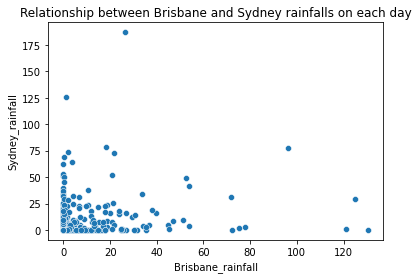

In [12]:
sns.scatterplot(x='Brisbane_rainfall', y='Sydney_rainfall', data=df)

plt.title("Relationship between Brisbane and Sydney rainfalls on each day")

plt.show()

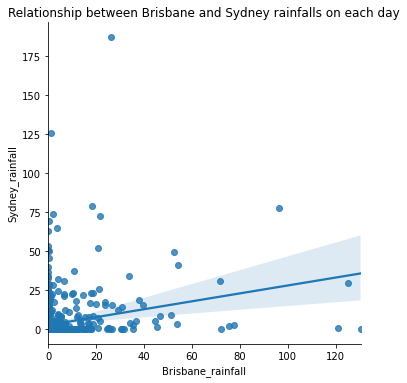

In [13]:
sns.lmplot(x='Brisbane_rainfall', y='Sydney_rainfall', data=df)
plt.title("Relationship between Brisbane and Sydney rainfalls on each day")

plt.show()

In [14]:
correlation_value = df['Brisbane_rainfall'].corr(df['Sydney_rainfall']) 

correlation_value

0.24361685166267863

While 1 represents the perfect positive correlation, there is a slight positive correlation between the rainfalls in Brisbane and Sydney. 
Hence, there is a WEAK linear relationship between Brisbane and Sydney rainfall volume on each day.

Now, it's time to find the significant periods for each city based on the information we got so far. 
Based on the charts and the dataframe, I presumed a moving average more than 25mm per day can be considered significant rainfall. When the average of rainfall over a 4 day period is more than 25mm, it means the total of the rainfall for those 4 days is more than 100mm which is a significant amount of rainfall and therefore, we can consider those 4 days as our "significant periods". 


In [15]:
#Here are the Brisbane significant periods of heavy rainfall in a new dataframe.

BNE_Sig_Period = df[df['BNE_4'] > 25]
BNE_Sig_Period

,Product code_x,Bureau of Meteorology station number_x,Year,Month,Day,Brisbane_rainfall,Period over which rainfall was measured (days)_x,Quality_x,Product code_y,Bureau of Meteorology station number_y,Sydney_rainfall,Period over which rainfall was measured (days)_y,Quality_y,Date,BNE_4,SYD_4
76,IDCJAC0009,40913,2019,3,18,18.4,1.0,N,IDCJAC0009,66006,79.0,1.0,Y,2019-03-18,29.050000,36.300
77,IDCJAC0009,40913,2019,3,19,18.8,1.0,N,IDCJAC0009,66006,8.2,1.0,Y,2019-03-19,32.700000,36.050
345,IDCJAC0009,40913,2019,12,12,130.4,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-12-12,32.600000,0.000
346,IDCJAC0009,40913,2019,12,13,0.0,1.0,N,IDCJAC0009,66006,0.1,1.0,Y,2019-12-13,32.600000,0.025
347,IDCJAC0009,40913,2019,12,14,26.6,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-12-14,39.250000,0.025
348,IDCJAC0009,40913,2019,12,15,0.0,1.0,N,IDCJAC0009,66006,0.6,1.0,Y,2019-12-15,39.250000,0.175
382,IDCJAC0009,40913,2020,1,18,71.6,1.0,N,IDCJAC0009,66006,31.0,1.0,Y,2020-01-18,29.950000,11.600
383,IDCJAC0009,40913,2020,1,19,21.6,1.0,N,IDCJAC0009,66006,5.0,1.0,Y,2020-01-19,35.000000,12.850
384,IDCJAC0009,40913,2020,1,20,0.8,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2020-01-20,31.200000,12.600
402,IDCJAC0009,40913,2020,2,7,96.4,1.0,N,IDCJAC0009,66006,77.7,1.0,N,2020-02-07,47.050000,21.050


count    29.000000
mean     37.151149
std       7.169453
min      26.400000
25%      32.450000
50%      36.150000
75%      40.300000
max      50.000000
Name: BNE_4, dtype: float64

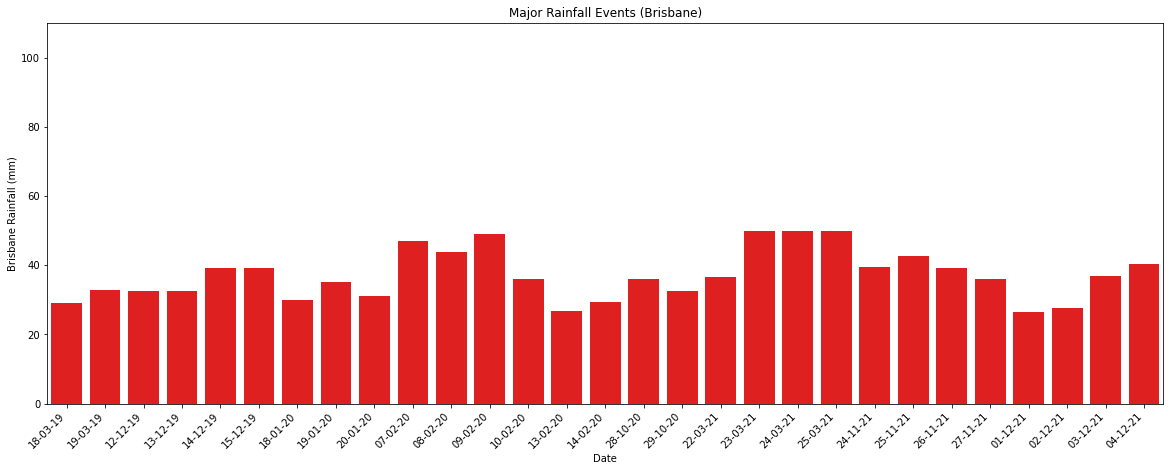

In [17]:
fig,ax = plt.subplots(figsize=(20,7))

sns.barplot(x=BNE_Sig_Period['Date'], y=BNE_Sig_Period['BNE_4'], color="red", ax = ax)
ax.set_xticklabels(labels=BNE_Sig_Period['Date'].dt.strftime('%d-%m-%y'), rotation=45, ha='right')
ax.set_ylim(0, 110)
plt.title("Major Rainfall Events (Brisbane)")
plt.xlabel("Date")
plt.ylabel("Brisbane Rainfall (mm)")

BNE_Sig_Period['BNE_4'].describe()


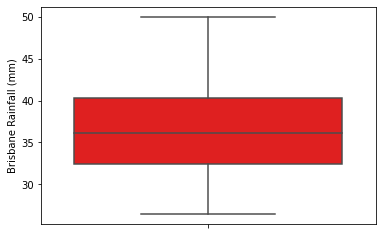

In [18]:
sns.boxplot(y=BNE_Sig_Period['BNE_4'], color = 'red')

plt.ylabel("Brisbane Rainfall (mm)")
plt.show()

In [19]:
# I did the same analysis for Sydney to find it's "significant periods" of rainfall.
SYD_Sig_Period = df[df['SYD_4'] > 25]
SYD_Sig_Period

,Product code_x,Bureau of Meteorology station number_x,Year,Month,Day,Brisbane_rainfall,Period over which rainfall was measured (days)_x,Quality_x,Product code_y,Bureau of Meteorology station number_y,Sydney_rainfall,Period over which rainfall was measured (days)_y,Quality_y,Date,BNE_4,SYD_4
76,IDCJAC0009,40913,2019,3,18,18.4,1.0,N,IDCJAC0009,66006,79.0,1.0,Y,2019-03-18,29.05,36.300
77,IDCJAC0009,40913,2019,3,19,18.8,1.0,N,IDCJAC0009,66006,8.2,1.0,Y,2019-03-19,32.70,36.050
78,IDCJAC0009,40913,2019,3,20,0.0,1.0,N,IDCJAC0009,66006,11.5,1.0,Y,2019-03-20,22.80,34.975
79,IDCJAC0009,40913,2019,3,21,0.0,1.0,N,IDCJAC0009,66006,6.8,1.0,Y,2019-03-21,9.30,26.375
261,IDCJAC0009,40913,2019,9,19,0.2,1.0,N,IDCJAC0009,66006,28.4,1.0,Y,2019-09-19,1.00,28.100
262,IDCJAC0009,40913,2019,9,20,0.0,1.0,N,IDCJAC0009,66006,0.0,NaN,Y,2019-09-20,1.00,28.100
403,IDCJAC0009,40913,2020,2,8,0.2,1.0,N,IDCJAC0009,66006,69.2,1.0,N,2020-02-08,43.70,37.500
404,IDCJAC0009,40913,2020,2,9,21.6,1.0,N,IDCJAC0009,66006,72.6,1.0,N,2020-02-09,48.95,55.625
405,IDCJAC0009,40913,2020,2,10,26.4,1.0,N,IDCJAC0009,66006,187.0,1.0,N,2020-02-10,36.15,101.625
406,IDCJAC0009,40913,2020,2,11,30.8,1.0,N,IDCJAC0009,66006,0.0,NaN,N,2020-02-11,19.75,82.200


count     21.000000
mean      47.077381
std       20.709421
min       26.250000
25%       31.900000
50%       36.300000
75%       62.200000
max      101.625000
Name: SYD_4, dtype: float64

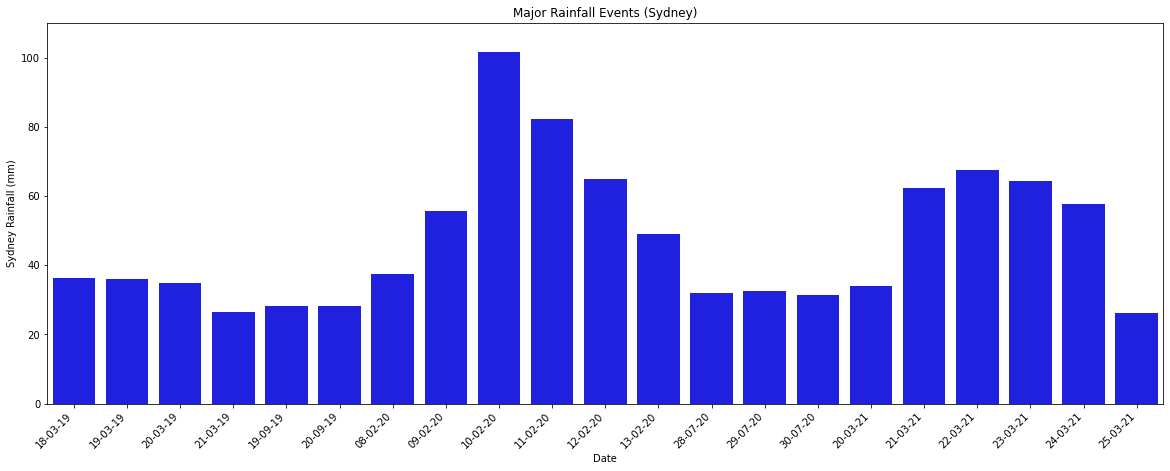

In [20]:
fig,ax = plt.subplots(figsize=(20,7))

sns.barplot(x=SYD_Sig_Period['Date'], y=SYD_Sig_Period['SYD_4'], color="blue", ax=ax)
ax.set_xticklabels(labels=SYD_Sig_Period['Date'].dt.strftime('%d-%m-%y'), rotation=45, ha='right')
ax.set_ylim(0, 110)
plt.xlabel("Date")
plt.ylabel("Sydney Rainfall (mm)")
plt.title("Major Rainfall Events (Sydney)")

SYD_Sig_Period['SYD_4'].describe()


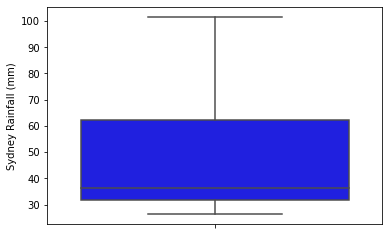

In [21]:
sns.boxplot(y=SYD_Sig_Period['SYD_4'], color = 'blue')

plt.ylabel("Sydney Rainfall (mm)")
plt.show()

### 5. Insight

According to my analysis, Brisbane heavy rainfalls are more often (29 times in 3 years), but with less severity (mean=37mm, max=50mm). 

On the other hand, Sydney heavy rainfalls are less often (21 times in 3 years), but with more severity (mean=47mm, max=102mm). 

Based on the data from 2019-2021, and my analysis, if we consider rainfall as an ONLY factor for assessing the flood risk in both cities, it seems that Sydney is more prone to flooding since the severity of rain is higher in Sydney and it is less likely that a city can handle a large amount of rain in a short time. 

See the news about historic February rainfall [Sydney has been hit by its heaviest rain in 30 years, bringing widespread flooding](https://www.bbc.com/news/world-australia-51439175).